In [1]:
#Importing libraries
import pandas as pd
import os
import json
import csv
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import PercentFormatter

In [2]:
#Importing the generic functions created
import sys
sys.path.append('../src/utils/')
from eda import calculate_mode, plot_attribute_counts_bad_rate_count_type

In [3]:
bad_officer_appointments = '../data/bad_officer_appointments.csv'
good_officer_appointments = '../data/good_officer_appointments.csv'
officer_information_directory = '../data/officer_attribute_store/'

In [4]:
def extract_officer_legal_form_data(csv_file_path, json_directory, appointment_type):
    bad_officer_appointments = pd.read_csv(csv_file_path)

    unique_officer_numbers = bad_officer_appointments['officer_number'].unique()
    matched_officer_data = []

    for officer_number in unique_officer_numbers:
        json_file_path = os.path.join(json_directory, officer_number + '.json')

        if not os.path.isfile(json_file_path):
            continue

        with open(json_file_path, 'r') as file:
            json_data = json.load(file)

        if 'legal_form' in json_data and appointment_type in json_data['legal_form']:
            legals = json_data['legal_form'][appointment_type]

            for company_number, legal_info in legals.items():
                legal_form_code = legal_info.get('legal_form_code')
                legal_form_description = legal_info.get('legal_form_description')

                matched_officer_data.append((officer_number, company_number, legal_form_code, legal_form_description))

    return pd.DataFrame(matched_officer_data, columns=['officer_number', 'company_number', 'legal_form_code', 'legal_form_description'])


In [5]:
bad_officer_legal_form_data_other = extract_officer_legal_form_data(bad_officer_appointments, officer_information_directory, 'other')
good_officer_legal_form_data_other = extract_officer_legal_form_data(good_officer_appointments, officer_information_directory, 'other')


In [6]:
bad_officer_legal_form_data_current = extract_officer_legal_form_data(bad_officer_appointments, officer_information_directory, 'current')
good_officer_legal_form_data_current = extract_officer_legal_form_data(good_officer_appointments, officer_information_directory, 'current')


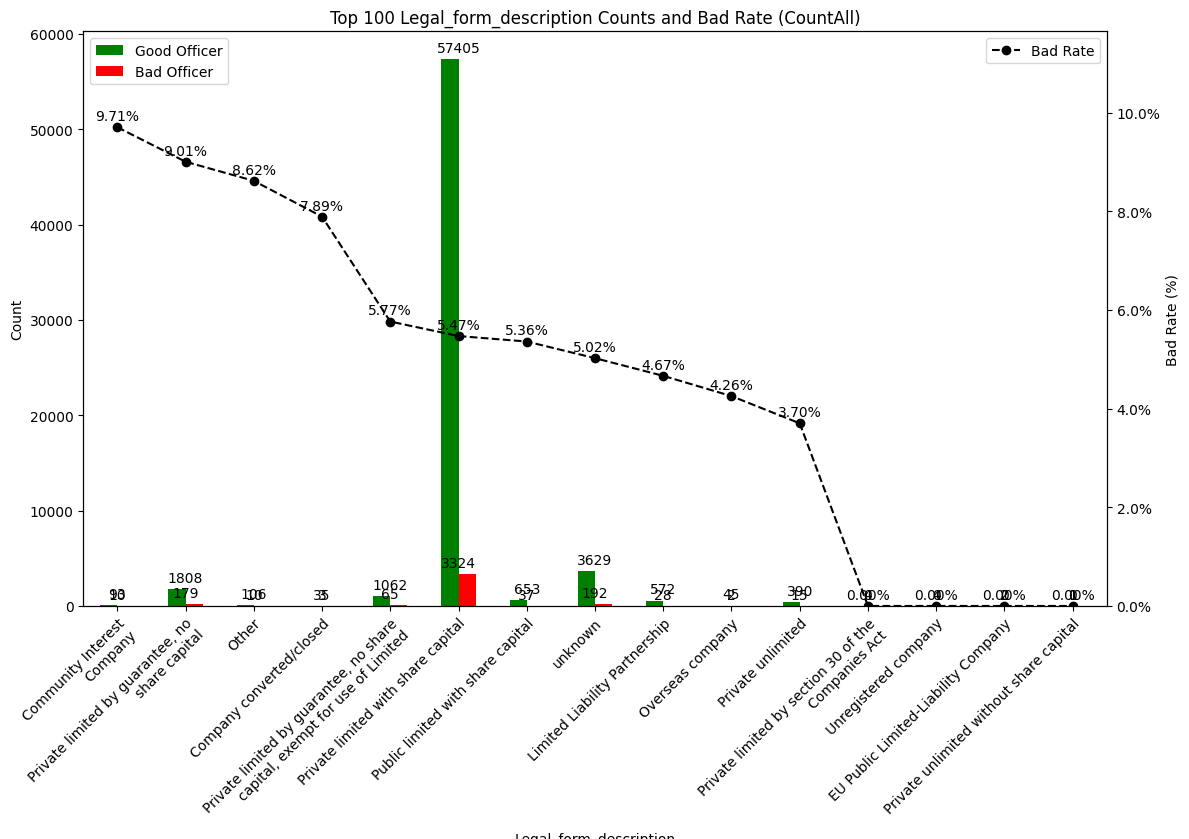

In [7]:
plot_attribute_counts_bad_rate_count_type(good_officer_legal_form_data_other, bad_officer_legal_form_data_other, 'legal_form_description', count_type='count_all', top_num_values=100)


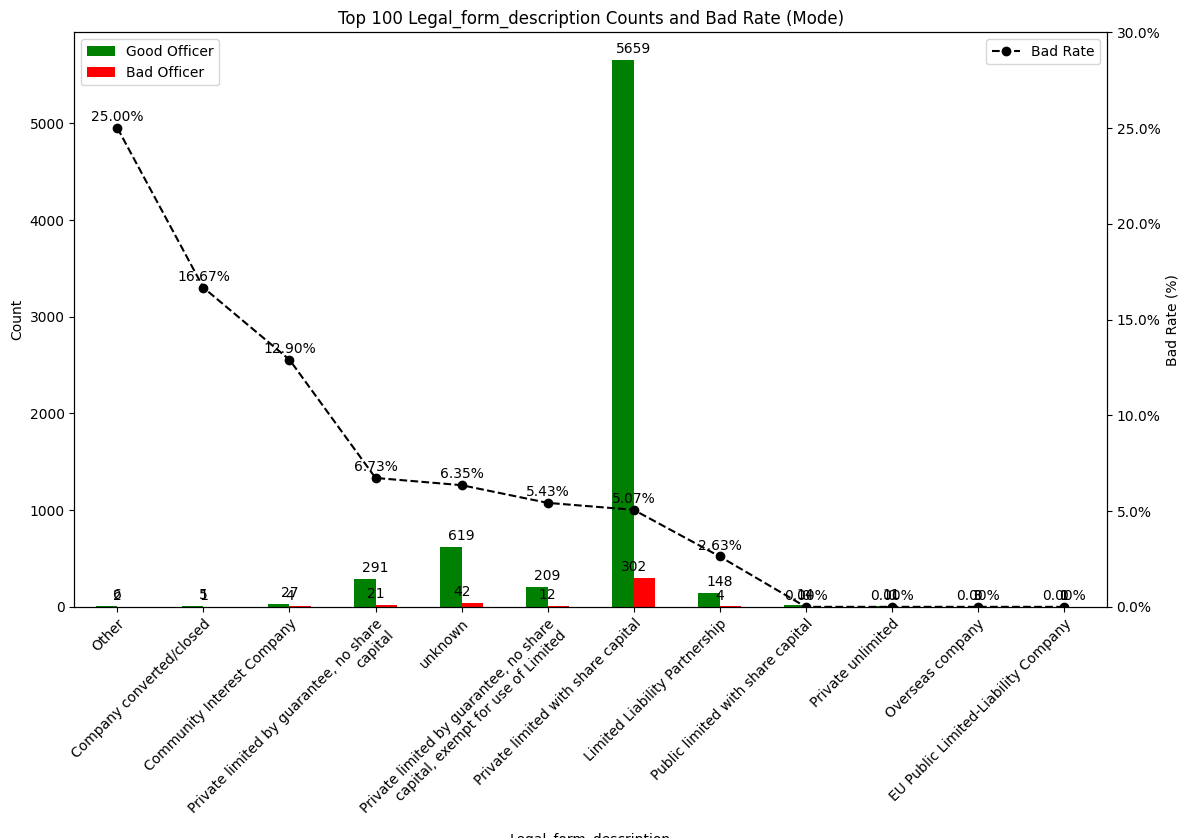

In [9]:
plot_attribute_counts_bad_rate_count_type(good_officer_legal_form_data_other, bad_officer_legal_form_data_other, 'legal_form_description', count_type='mode', top_num_values=100)


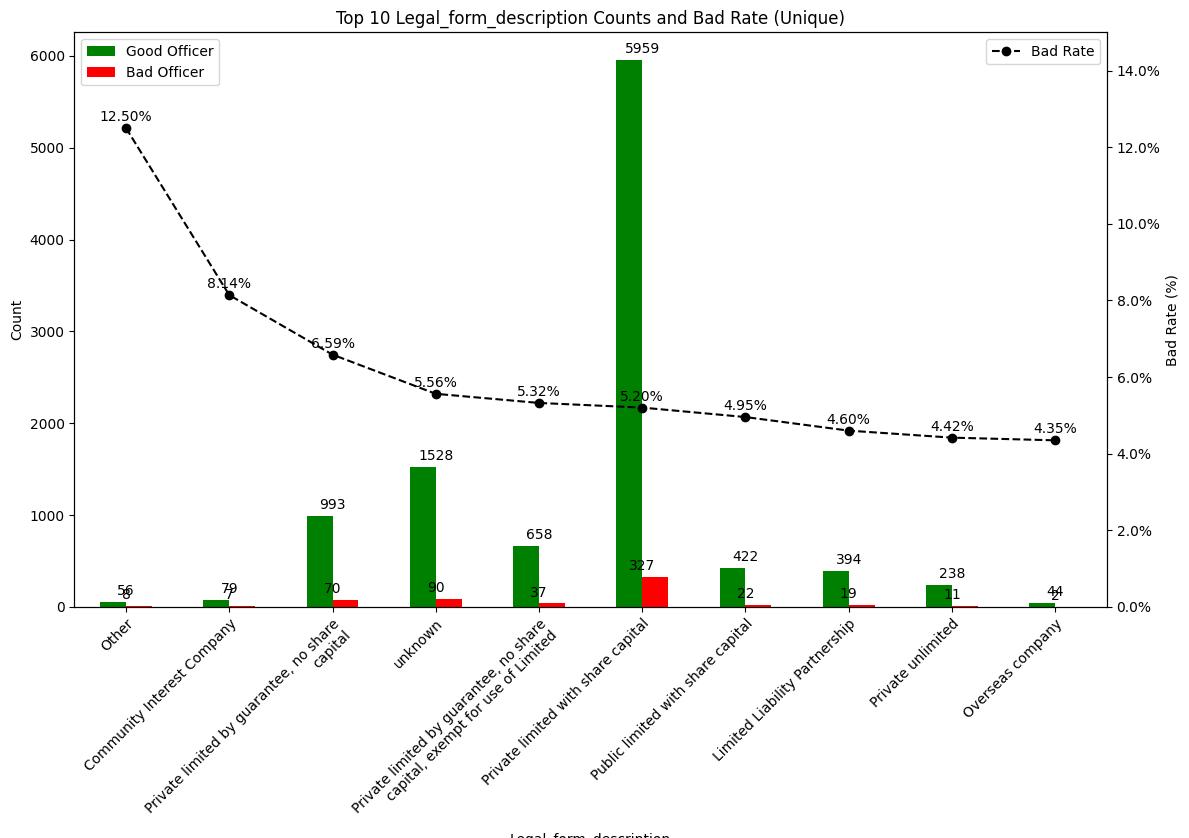

In [11]:
plot_attribute_counts_bad_rate_count_type(good_officer_legal_form_data_other, bad_officer_legal_form_data_other, 'legal_form_description', count_type='unique', top_num_values=10)


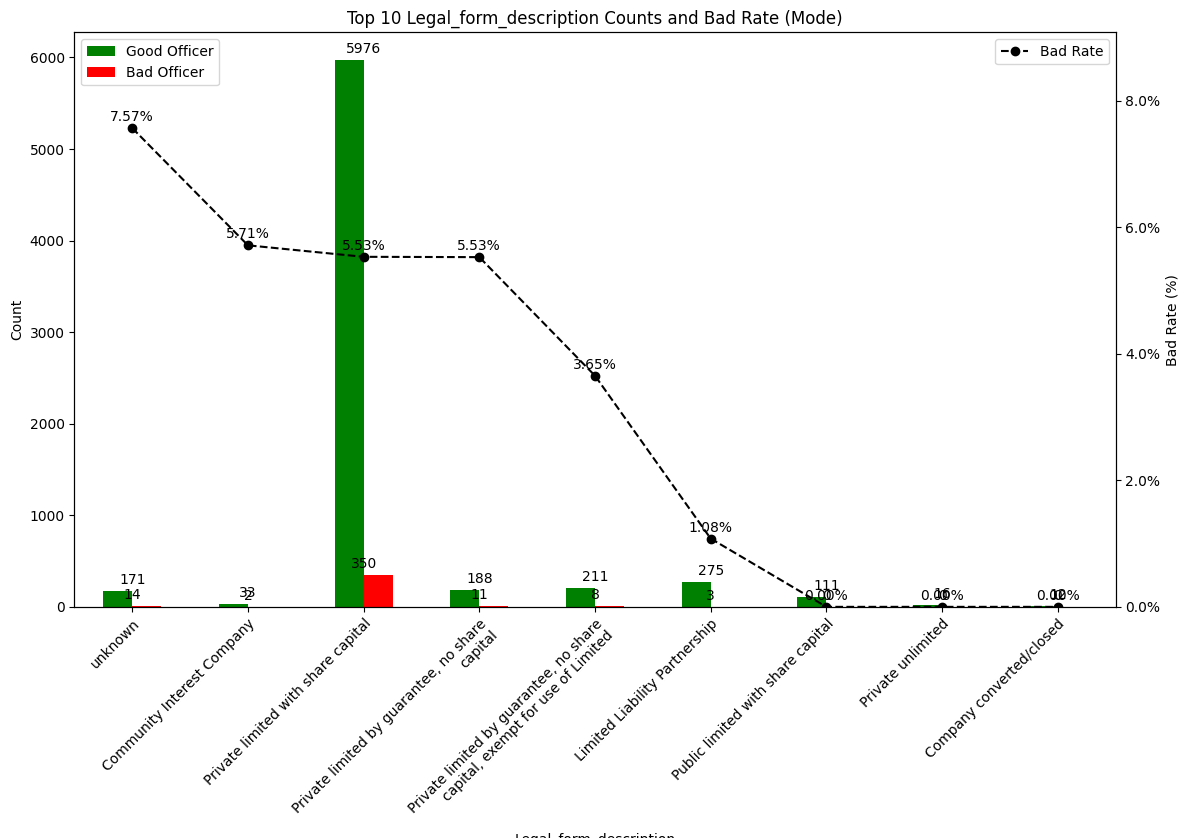

In [10]:
plot_attribute_counts_bad_rate_count_type(good_officer_legal_form_data_current, bad_officer_legal_form_data_current, 'legal_form_description', count_type='mode')
